In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts    

Во время выполнения этого задания я буду использовать распределение Хи-квадрат.                                  
Тут вы сможете найти информацию, если вам это будет интересно:                            
https://en.wikipedia.org/wiki/Chi-squared_distribution                                 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

# Генерация выборки выбранного расспределения на 1000 элементов

In [118]:
# Данное расспределение принимает на вход 1 параметр - k (число степеней свободы)
k = 2.7
chi2 = sts.chi2(df=k)
sample = chi2.rvs(1000)

print("Mean value: ",chi2.mean())
print("Standard deciation value: ",chi2.std())
# Матожидание такого расспределения равно параметру k, а его дисперсия - 2k

Mean value:  2.7
Standard deciation value:  2.32379000772445


# Гистограмма выборки, и теор. функция плотности

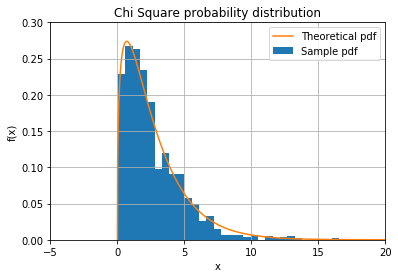

In [120]:
plt.hist(sample, bins=30, density=True, label='Sample pdf')

x = np.linspace(0,20,1000)
pdf = chi2.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([-5, 20, 0, 0.3])
plt.title('Chi Square probability distribution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# Генерация 1000 выборок объема subset_size

In [121]:
subset_size = [1, 3, 8, 30, 50]

means_sets = [ [] for i in range(len(subset_size)) ]


for i in range(1000):
    for j in range(len(subset_size)):
        means_sets[j].append(chi2.rvs(subset_size[j]).mean())

# Гистограммы распределений выборочных средних

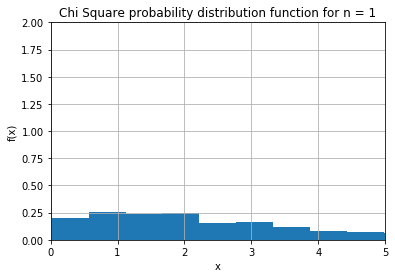

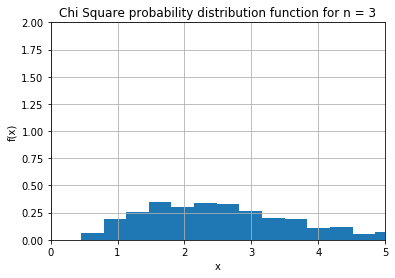

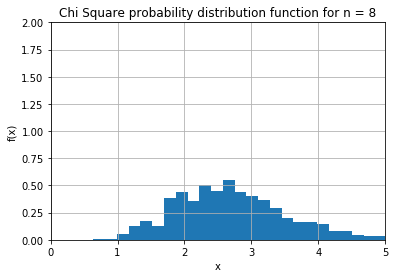

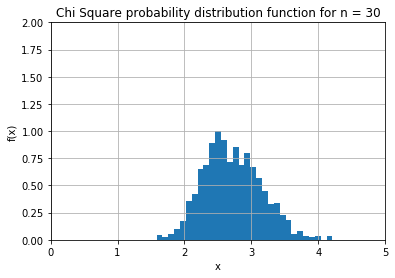

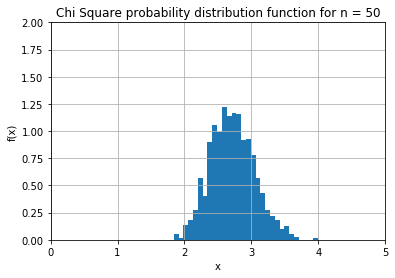

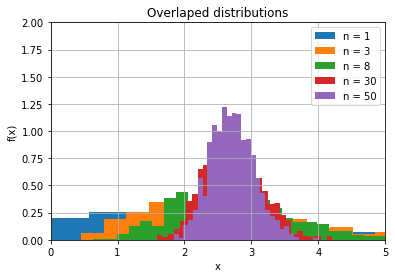

In [124]:
#гистограммы выборки
for i in range(len(subset_size)):
    plt.hist(means_sets[i], bins=30, density=True)
    plt.grid()
    plt.axis([0, 5, 0, 2.])
    plt.title('Chi Square probability distribution function for n = ' + str(subset_size[i]))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()
    
for i in range(len(subset_size)):
    plt.hist(means_sets[i], bins=30, density=True, label='n = ' + str(subset_size[i]))
    plt.grid()
    plt.axis([0, 5, 0, 2.])
    plt.title('Overlaped distributions')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')

# Теоретические значения среднего и дисперсии

In [109]:
sample_mean = k
sample_variance = 2*k

# Плотность соответствующего нормального распределения поверх каждой гистограммы

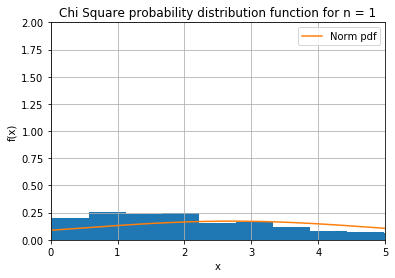

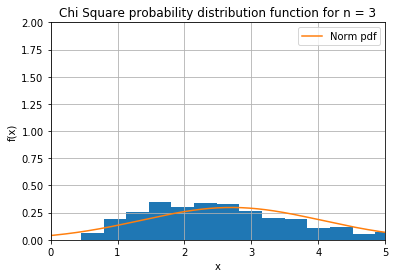

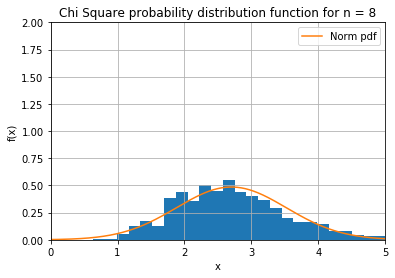

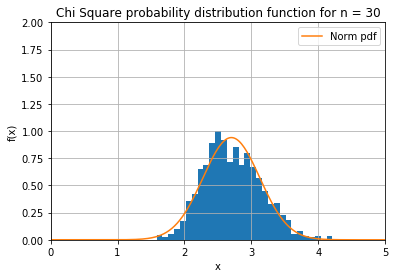

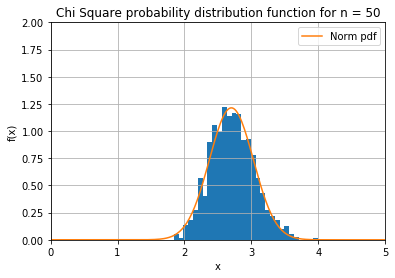

In [125]:
for i in range(len(subset_size)):
    plt.hist(means_sets[i], bins=30, density=True)
    plt.grid()
    plt.axis([0, 5, 0, 2.])
    plt.title('Chi Square probability distribution function for n = ' + str(subset_size[i]))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    
    normRv = sts.norm(loc=sample_mean, scale=np.sqrt(sample_variance/subset_size[i]))    
    x_1 = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x_1)
    plt.plot(x_1, pdf, label="Norm pdf")
    plt.legend(loc = "upper right")
    plt.show()

# Выводы

Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является подтверждением ЦПТ.  
С ростом n точность нормальной аппроксимации увеличивается.